In [5]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
img_array = cv2.imread("Train_dataset/Closed_Eyes/s0001_00056_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

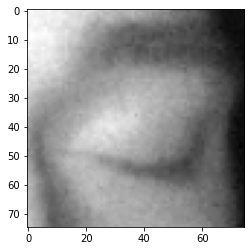

In [7]:
plt.imshow(img_array,cmap="gray")

In [8]:
img_array.shape

(75, 75)

C:\Users\Bharathi\AppData\Local\Temp/ipykernel_10988/1502352261.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(img_array, Cmap="gray")


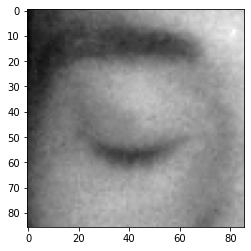

In [9]:
 Datadirectory = "Train_dataset/"
 Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, Cmap="gray")
        plt.show()
        break
    break

C:\Users\Bharathi\AppData\Local\Temp/ipykernel_10988/2568129605.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(new_array, Cmap="gray")


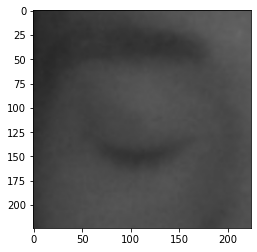

In [10]:
img_size =224

new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, Cmap="gray")
plt.show()

In [7]:
# Reading all the images and converting them into an array for data and labels

In [8]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()

In [10]:
print(len(training_Data))

5000


In [11]:
import random

random.shuffle(training_Data)

In [12]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [13]:
X.shape

(5000, 224, 224, 3)

In [14]:
# Normalize the data
X = X/255.0

In [15]:
Y = np.array(y)

In [16]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [17]:
# Deep learning model for training 

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.mobilenet.MobileNet()

In [20]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [21]:
# Transfer Learning

In [22]:
base_input = model.layers[0].input

In [23]:
base_output = model.layers[-4].output

In [24]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [25]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [26]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [ ]:
# Settings for binary Classification(open/closed)

In [27]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"]) 

In [28]:
new_model.fit(X,Y, epochs = 10,validation_split = 0.1)

Epoch 1/10
141/141 [==============================] - 470s 3s/step - loss: 0.1216 - accuracy: 0.9636 - val_loss: 2.4436 - val_accuracy: 0.6460
Epoch 2/10
141/141 [==============================] - 451s 3s/step - loss: 0.0370 - accuracy: 0.9851 - val_loss: 0.6588 - val_accuracy: 0.9140
Epoch 3/10
141/141 [==============================] - 481s 3s/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0601 - val_accuracy: 0.9740
Epoch 4/10
141/141 [==============================] - 489s 3s/step - loss: 0.0250 - accuracy: 0.9911 - val_loss: 0.0937 - val_accuracy: 0.9700
Epoch 5/10
141/141 [==============================] - 488s 3s/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0552 - val_accuracy: 0.9840
Epoch 6/10
141/141 [==============================] - 484s 3s/step - loss: 0.0133 - accuracy: 0.9951 - val_loss: 0.0597 - val_accuracy: 0.9840
Epoch 7/10
141/141 [==============================] - 484s 3s/step - loss: 0.0281 - accuracy: 0.9918 - val_loss: 0.0817 - val_accuracy: 0.9820

In [29]:
new_model.save('my_model.h5')

In [11]:
new_model = tf.keras.models.load_model('my_model.h5')

In [12]:
# checking the network for Predictions

In [13]:
img_array = cv2.imread('Train_dataset/Closed_Eyes/s0001_00155_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [14]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [15]:
X_input.shape 

(1, 224, 224, 3)

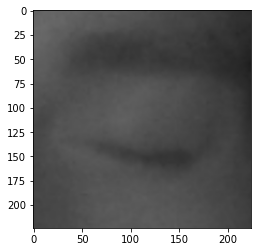

In [16]:
plt.imshow(new_array)

In [17]:
X_input = X_input/255.0

In [18]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 1s 698ms/step


In [19]:
prediction

array([[5.1191266e-05]], dtype=float32)

In [20]:
# lets Check on Unkown Images


In [21]:
img = cv2.imread('img.jpg')

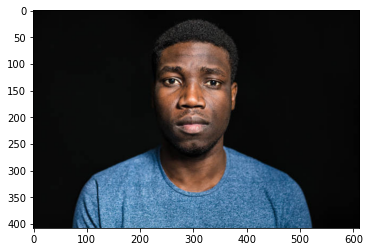

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [23]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [24]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [26]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [27]:
for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

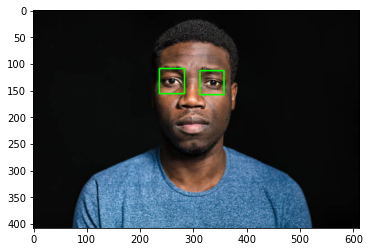

In [28]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [29]:
#cropping the Eye image

In [30]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

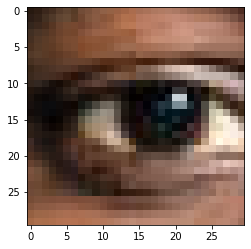

In [31]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [32]:
eyes_roi.shape

(30, 30, 3)

In [33]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0)
final_image = final_image/255.0

In [34]:
final_image.shape

(1, 224, 224, 3)

In [35]:
new_model.predict(final_image)

1/1 [==============================] - 0s 53ms/step


array([[0.99999934]], dtype=float32)

In [36]:
#Realtime video Demo

In [42]:
import cv2 
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for (x,y,w,h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
            
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis =0)
    final_image = final_image/255.0
    
    predictions = new_model.predict(final_image)
    if (predictions>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,2.5,4)
    
    # Draw a rectangle around the faces
    for (x, y, w, h) in eyes:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    # use putText() method for inserting text on video
    cv2.putText(frame, 
                status,
                (50, 50),
                font, 3, 
                (0, 0, 255),
                2,
                cv2.LINE_4)
    cv2.imshow('Drowsiness Detection Tutorial', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destoryAllWindows()

Eyes are not detected
1/1 [==============================] - 0s 107ms/step
False
1/1 [==============================] - 0s 88ms/step
False
Eyes are not detected
1/1 [==============================] - 0s 59ms/step
False
Eyes are not detected
1/1 [==============================] - 0s 83ms/step
False
Eyes are not detected
1/1 [==============================] - 0s 64ms/step
False
1/1 [==============================] - 0s 104ms/step
False
Eyes are not detected
1/1 [==============================] - 0s 68ms/step
False
Eyes are not detected
1/1 [==============================] - 0s 64ms/step
False
Eyes are not detected
1/1 [==============================] - 0s 61ms/step
False
Eyes are not detected
1/1 [==============================] - 0s 109ms/step
False
Eyes are not detected
1/1 [==============================] - 0s 98ms/step
False
Eyes are not detected
1/1 [==============================] - 0s 108ms/step
False
Eyes are not detected
1/1 [==============================] - 0s 68ms/step
False


KeyboardInterrupt: 